# Linear Regression
**Sibt ul Hussain**

In [1]:
import numpy as np

In [2]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [3]:
f=lambda x: x**4-4*x**3+2

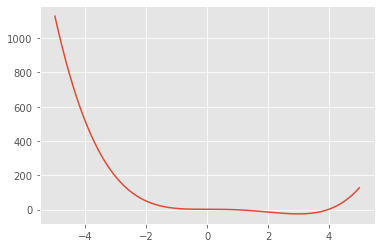

In [4]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [5]:
minimum=+np.inf
mx=+np.inf

mx = x[np.argmin(y)]

print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997997997998


$$ f'(x) = 4x^3-12x^2 $$

### Gradient Descent

In [6]:
def f_derivative(x):
    
    # Your code here 
    # Calculate the derivative and write your code here
    return 4*x**3-12*x**2

In [7]:
np.random.rand(1,1) 

array([[0.4284412]])

In [11]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001
# Your code here
count = 0
while(abs(x_old-x_new)>precision):
    x_old = x_new
    x_new = x_old-eps*(f_derivative(x_new))
    count+=1

print ("Local minimum occurs at", x_new,count)

Local minimum occurs at [[2.9999856]] 50


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [13]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 -13.5 -4.499993673157121e-05


### Let's generate some random data

In [14]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

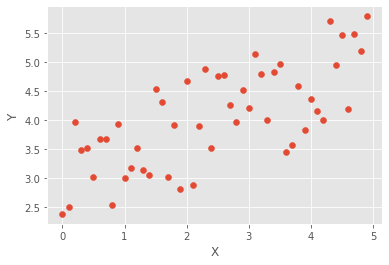

In [15]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [16]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [17]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [18]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [19]:
print ecf

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(ecf)? (<ipython-input-19-a314636373fe>, line 1)

In [21]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [22]:
print (ecf.shape)

(1000, 1000)


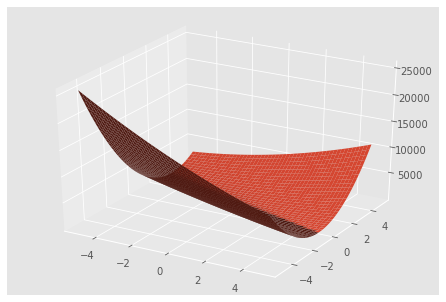

In [23]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [24]:
def hyp(theta, X):
    # Your code here
    
    return X.dot(theta)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [25]:
def cost_function(theta,X,Y):
    # Your code here
    nexamples = float(X.shape[0])
    cost = (np.sum(np.square((hyp(theta,X))-Y)))/(2*nexamples)
    return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [26]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    nfeature = X.shape[1]
    
    theta_i = np.zeros(nfeature)
    for i in range(nfeature):
        theta_i[i] = np.sum((((hyp(theta,X))-Y)*X[:,i]))/(nexamples)
    return theta_i

In [28]:
print( X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [23]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print thetas

[0.5881308  0.89771373]


In [24]:
cf=cost_function(thetas,nx,Y)
print cf

1.7125713967487786


In [25]:
ad=derivative_cost_function(thetas,nx,Y)
print ad

[-4.00013682 -1.73664409]


In [38]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=200000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    print(thetas)
    eps=0.000001
    alpha=0.01
    cf=[]
    numiter=0
    theta_new = np.ones(X.shape[1],)
    while (numiter<maxniter):
        theta_new = thetas - alpha*(derivative_cost_function(thetas,X,Y))
        if(np.all(np.abs(theta_new-thetas))<eps):
            break
        thetas = theta_new
        numiter+=1
    print (numiter)
    return theta_new

In [39]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function)
print theta_new

[0.2723164  0.71860593]
12959
[0.46585408 2.9339358 ]


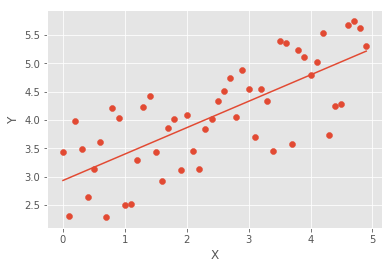

In [40]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))